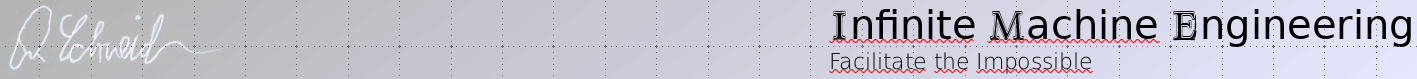

# Leistungsanpassung / impedance matching

In [60]:
clear all;
close all;

fig=1;

#available_graphics_toolkits()
#loaded_graphics_toolkits()
graphics_toolkit ("gnuplot");

## Simple Circuit 1
a Source with a voltage of 1V with internal resistance Ri in serial. A simple load resistor is connected to that power supply

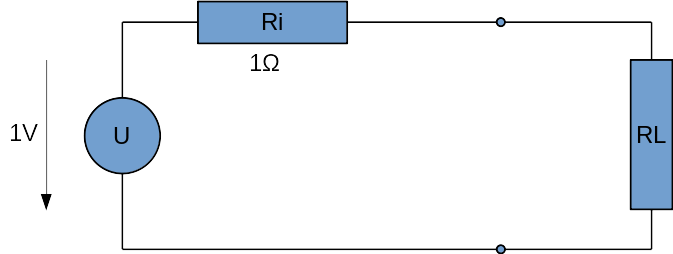

### first scenario - fixed Ri, variable Rload

assume Ri is fixed at 1 Ohm, Rload is varied from 0.001 to 5 Ohm

In [61]:
nos = 512;
usource=1;
ri=1;
rl=0.001:(4.-0.001)./(nos.-1):5;  #load resistance from 1mOhm to 5 Ohm
isource=usource./(ri.+rl);        #Current through source caused by variable rl
psource=usource.*isource;         #Power at variable rl
pshort=(isource.^2).*ri;          #Short Circuit Peak Impulse Power
prl=(isource.^2).*rl;             #Power at load resistance

eta = rl./(rl.+ri);               #efficiency

max(psource)                      #Max Power possible
max(prl)                          #Max Power possible @ Load
max(eta)                          #Max Efficency

ans = 0.9990
ans = 0.2500
ans = 0.8332


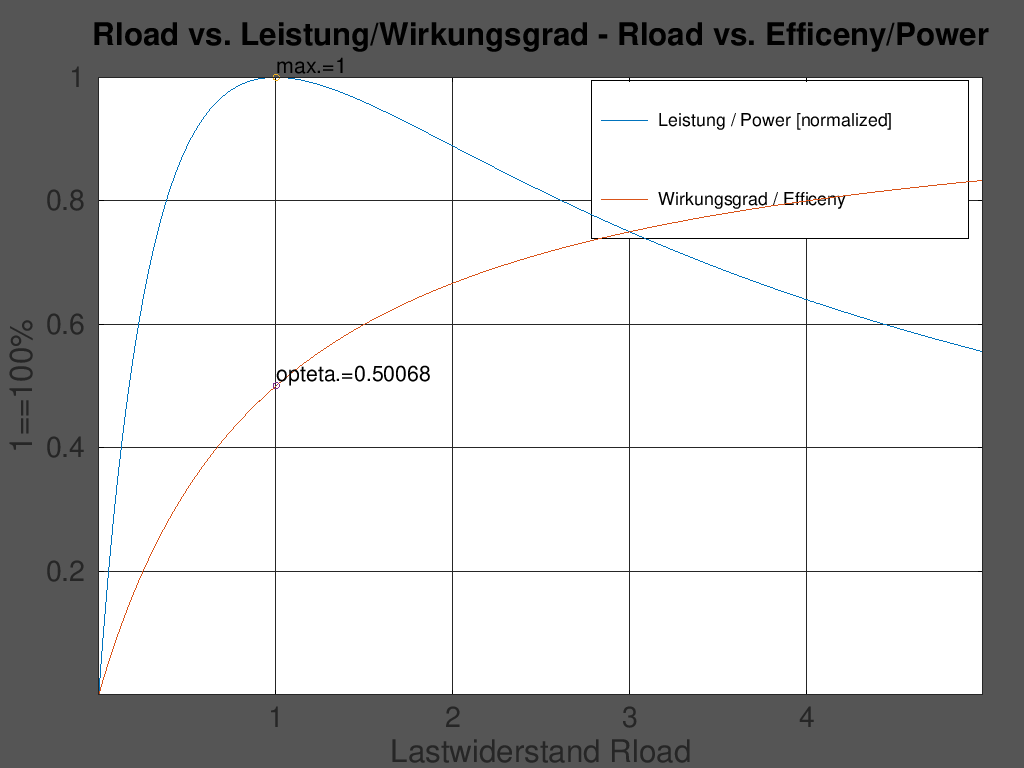

In [62]:
figure(fig++);
[maxy ind] = max(prl./max(prl));
plot(rl,prl./max(prl),'linewidth',3,...
       rl,eta,'linewidth',3,...
       rl(ind),prl(ind)./max(prl),'o',...
       rl(ind),eta(ind),'o');
text(rl(ind),prl(ind)./max(prl),...
['max.=',num2str(maxy)],...
'VerticalAlignment','bottom','HorizontalAlignment','left','FontSize',12);
text(rl(ind),eta(ind),...
['opteta.=',num2str(eta(ind))],...
'VerticalAlignment','bottom','HorizontalAlignment','left','FontSize',12);
grid on;
title("Rload vs. Leistung/Wirkungsgrad - Rload vs. Efficeny/Power");
xlabel("Lastwiderstand Rload");
ylabel("1==100%");
lgd=legend ("Leistung / Power [normalized]","Wirkungsgrad / Efficeny");
set(lgd,'FontSize',10);
axis("tight");
#set (gca, 'linewidth', 2);

* max Power at Load = 50% Efficency, when Ri equals Rload
* Cosspoint of Power and Efficency at 75% [Rl = 3*Ri --> when Rl is 2/3 of the sum of all resistance]
* high Efficency = small current & high voltage (low current = low looses at Ri)
* high Efficency = small power dissipated at Ri
* high current & small voltage = low Efficency


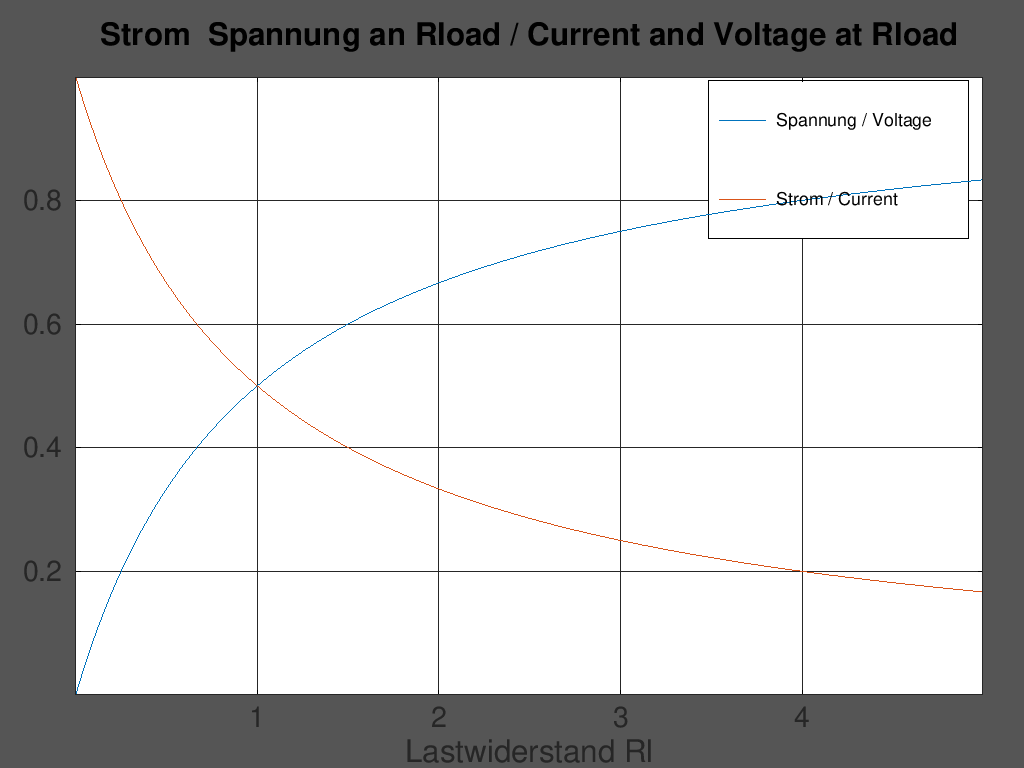

In [63]:
figure(fig++);
plot(rl,isource.*rl,'linewidth',2,rl,isource,'linewidth',2);
grid on;
title("Strom & Spannung an Rload / Current and Voltage at Rload");
xlabel("Lastwiderstand Rl");
#ylabel("1==100%");
lgd=legend ("Spannung / Voltage","Strom / Current");
set(lgd,'FontSize',10);
axis("tight");
set (gca, 'linewidth', 2);

###  second scenario - fixed Rload, variable Ri

In [64]:
rl=3;                             #Using Cosspoint
ri=0.001:(2.-0.001)./(nos.-1):2;  #source resistance from 1mOhm to 2 Ohm
isource=usource./(ri.+rl);        #Current through source caused by variable rl
psource=usource.*isource;         #Power at variable rl
pshort=(isource.^2).*ri;          #Short Circuit Peak Impulse Power
prl=(isource.^2).*rl;             #Power at load resistance

eta = rl./(rl.+ri);               #efficiency

max(psource)                      #Max Power possible

ans = 0.3332


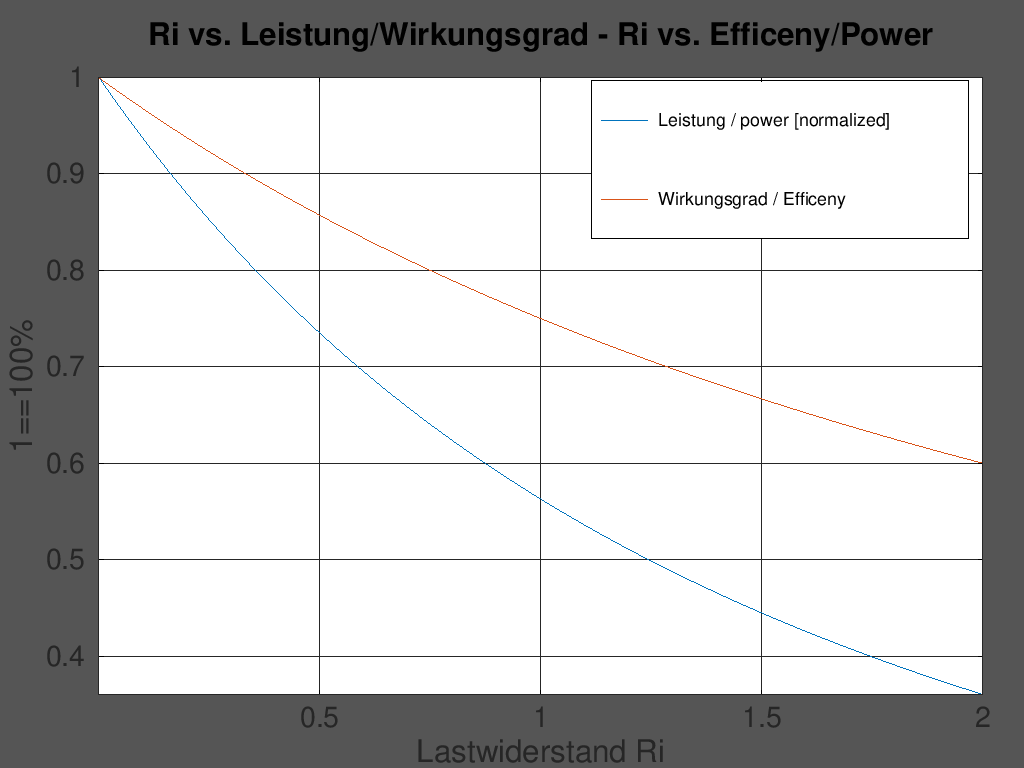

In [65]:
figure(fig++);
plot(ri,prl./max(prl),'linewidth',2,ri,eta,'linewidth',2);
grid on;
title("Ri vs. Leistung/Wirkungsgrad - Ri vs. Efficeny/Power");
xlabel("Lastwiderstand Ri");
ylabel("1==100%");
lgd=legend ("Leistung / power [normalized]","Wirkungsgrad / Efficeny");
set(lgd,'FontSize',10);
axis("tight");
set (gca, 'linewidth', 2);

QED: at a fixed Load, smaller Ri is better... - why? losses are minimized

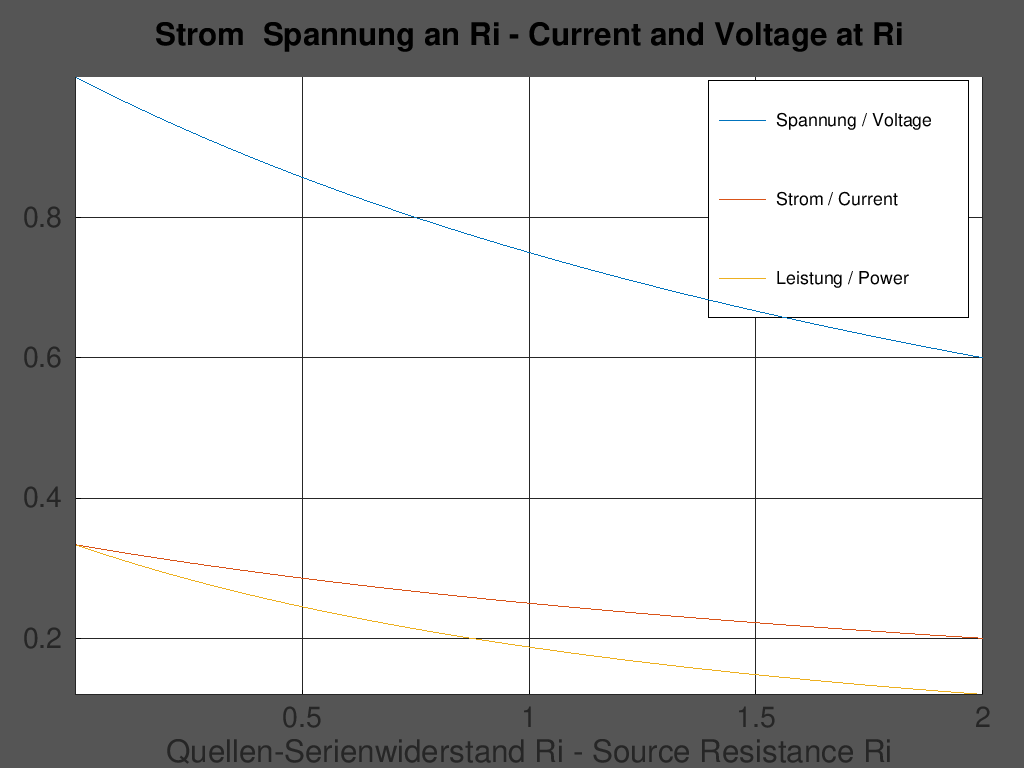

In [66]:
figure(fig++);
hold on
plot(ri,isource.*rl,'linewidth',2,ri,isource,'linewidth',2);
plot(ri,(isource.^2).*rl,'linewidth',2)
hold off
grid on;
title("Strom & Spannung an Ri - Current and Voltage at Ri");
xlabel("Quellen-Serienwiderstand Ri - Source Resistance Ri");
#ylabel("1==100%");
lgd=legend ("Spannung / Voltage","Strom / Current","Leistung / Power");
set(lgd,'FontSize',10);
axis("tight");
set (gca, 'linewidth', 2);

Also, only with very small Ri, the Voltage at Rload is approximately the target value of 1V, with increasing Ri, the voltage at Rload drops down. Conclusion: a power supply with constant voltage at variable loads needs a small Ri

In [67]:
ri=0.1:(2.-0.1)./(nos.-1):2;
rl=0.1:(4.-0.1)./(nos.-1):4;      #load resistance
[xx, yy] = meshgrid (ri, rl);

isource=usource./(xx.+yy);        #Current through source caused by variable rl
psource=usource.*isource;         #Power at variable rl
pshort=(isource.^2).*xx;          #Short Circuit Peak Impulse Power
prl=(isource.^2).*yy;             #Power at load resistance

eta = yy./(yy.+xx);               #efficiency

#max(psource)                     #Max Power possible

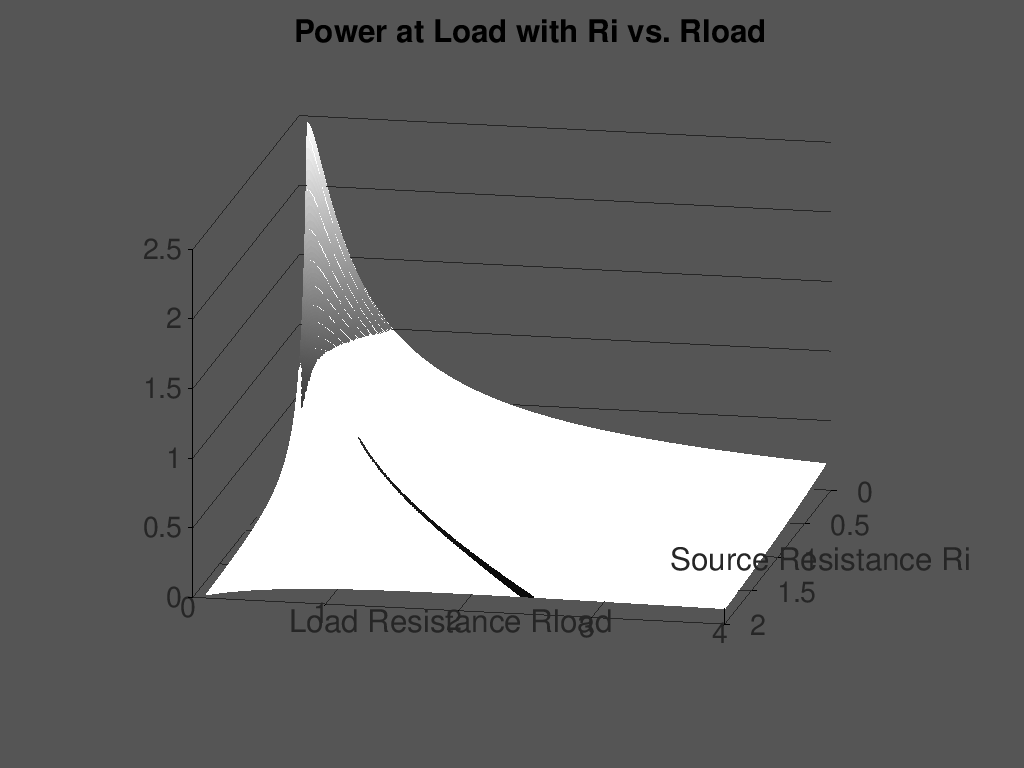

In [68]:
figure(fig++);
mesh(ri, rl, prl);
view([0.25 0.05 .10])
title("Power at Load with Ri vs. Rload");
xlabel("Source Resistance Ri");
ylabel("Load Resistance Rload");
#grid on;

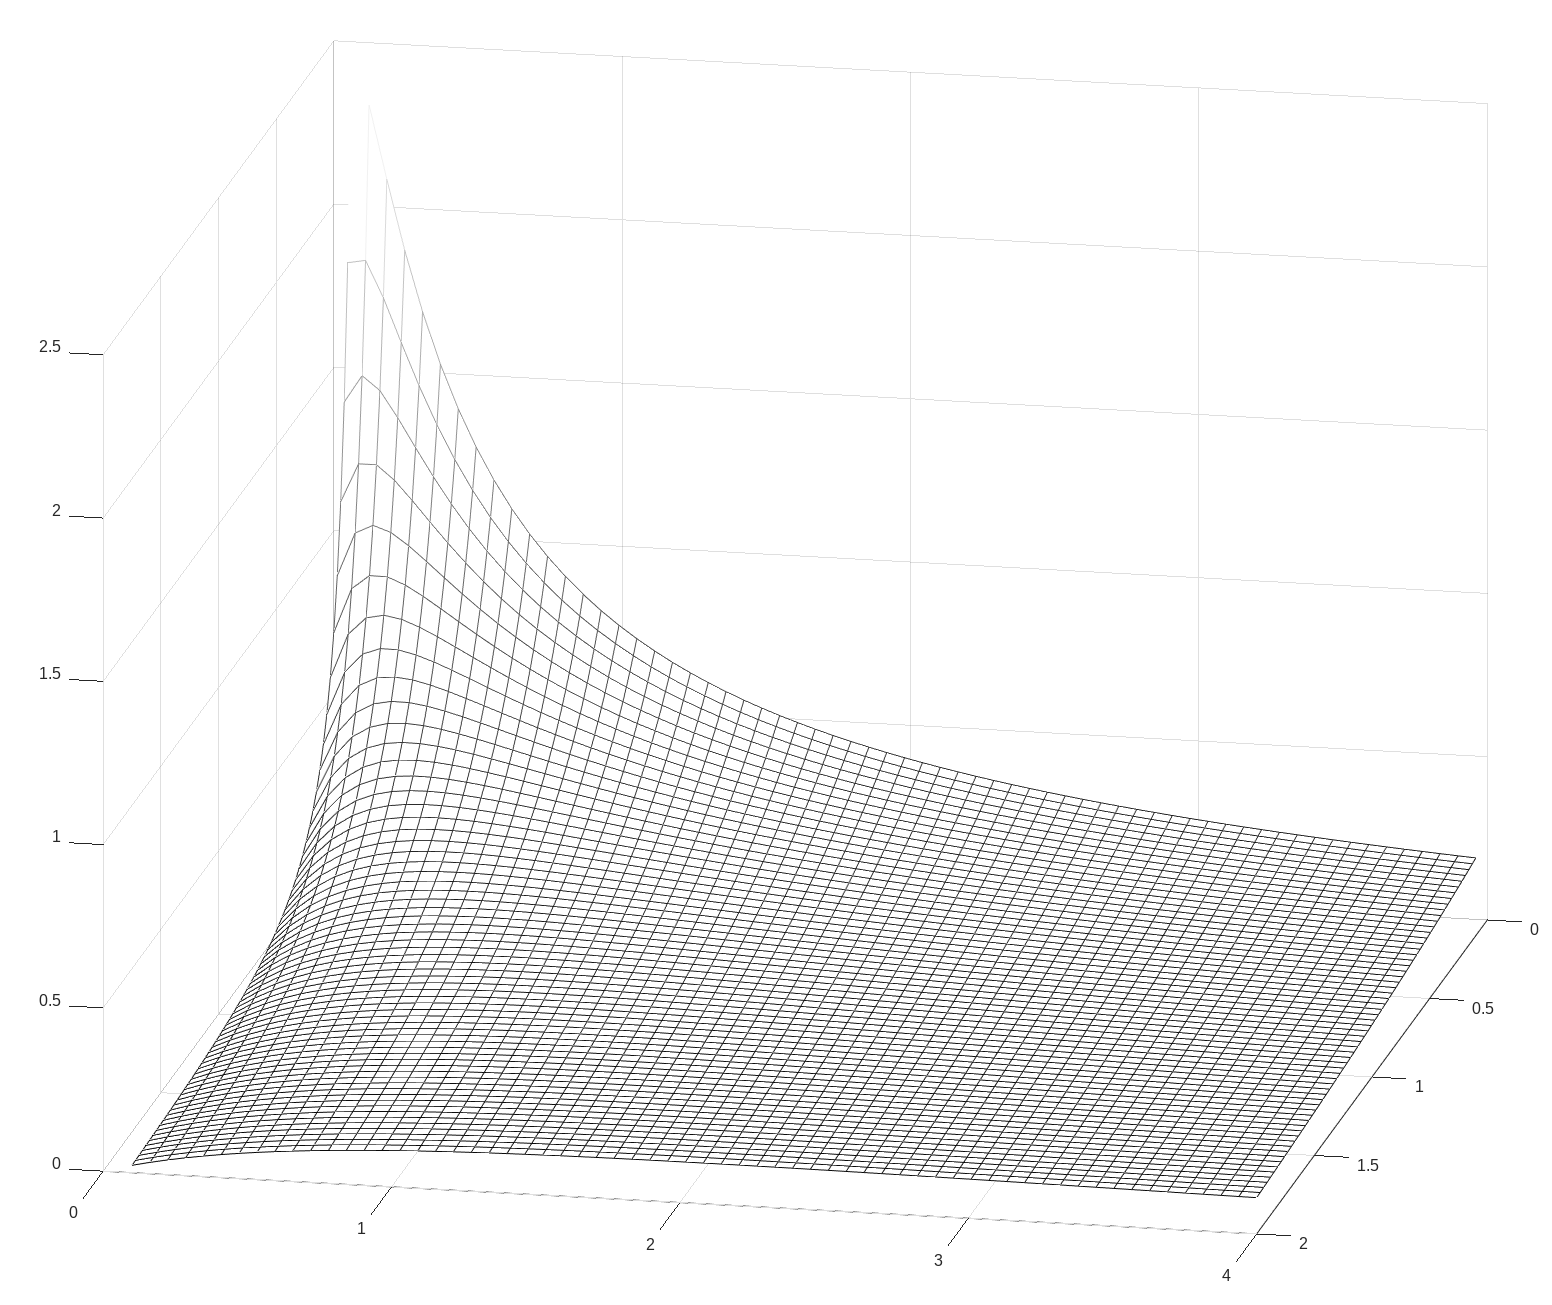

## Simple Circuit 2
a Source with a current of 1A with internal resistance Ri in parallel. A simple load resistor is connected to that power supply

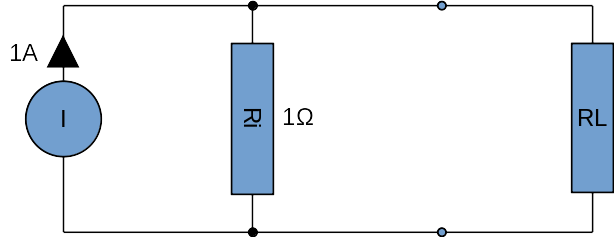

calculate efficency:
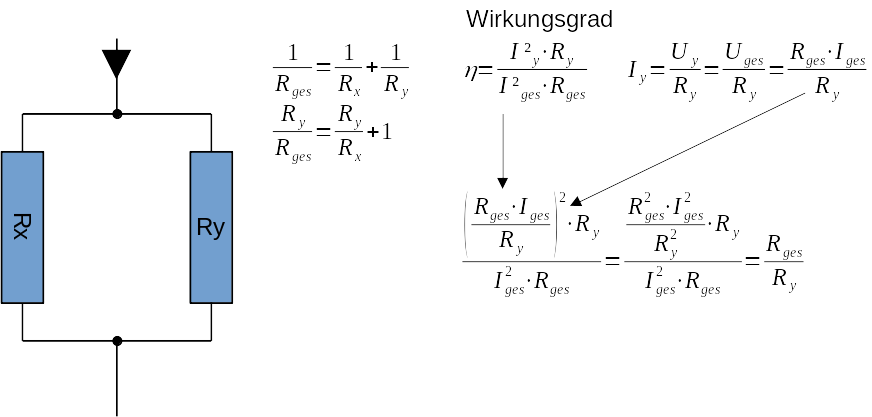

In [69]:
nos = 512;
isource=1;
ri=1;
rl=0.001:(4.-0.001)./(nos.-1):5;  #load resistance from 1mOhm to 5 Ohm
rparallel=1./((1./ri).+(1./rl));
usource=isource.*rparallel;        #Voltage at source caused by variable rl
psource=usource.*isource;         #Power at variable rl
pshort=(isource.^2).*min(rparallel);          #approx Short Circuit Power
prl=(usource.^2)./rl;             #Power at load resistance

eta = rparallel./rl;               #efficiency

max(psource)                      #Max Power possible
max(prl)                          #Max Power possible @ Load
max(eta)                          #Max Efficency

ans = 0.8332
ans = 0.2500
ans = 0.9990


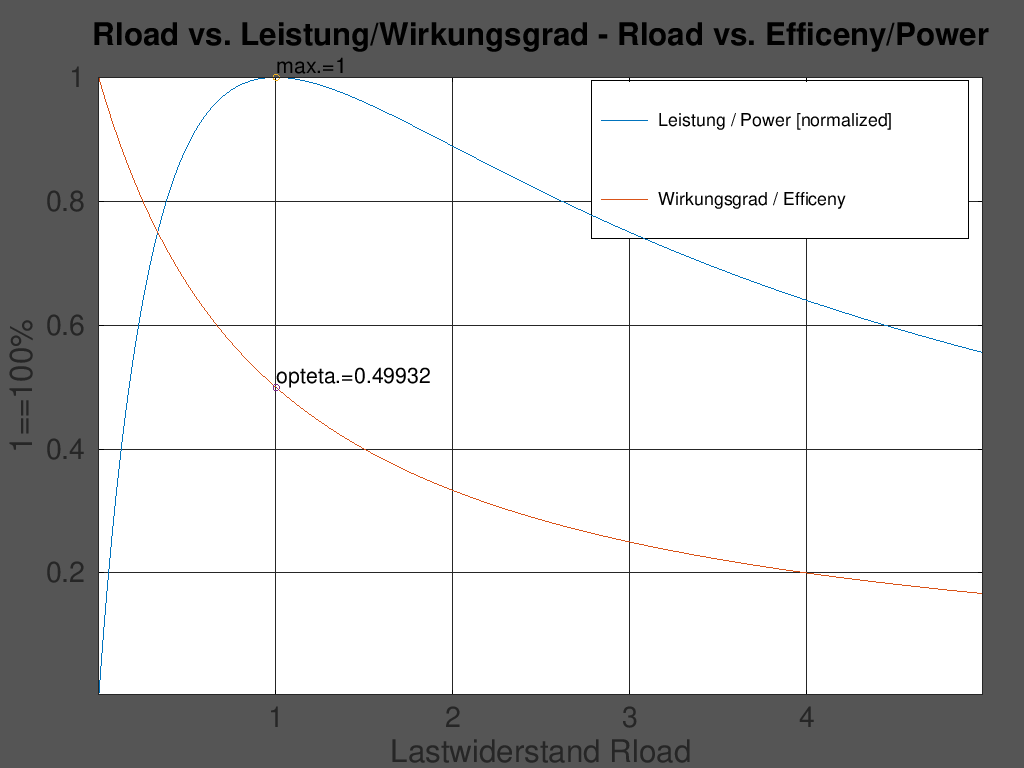

In [70]:
figure(fig++);
[maxy ind] = max(prl./max(prl));
plot(rl,prl./max(prl),'linewidth',3,...
       rl,eta,'linewidth',3,...
       rl(ind),prl(ind)./max(prl),'o',...
       rl(ind),eta(ind),'o');
text(rl(ind),prl(ind)./max(prl),...
['max.=',num2str(maxy)],...
'VerticalAlignment','bottom','HorizontalAlignment','left','FontSize',12);
text(rl(ind),eta(ind),...
['opteta.=',num2str(eta(ind))],...
'VerticalAlignment','bottom','HorizontalAlignment','left','FontSize',12);
grid on;
title("Rload vs. Leistung/Wirkungsgrad - Rload vs. Efficeny/Power");
xlabel("Lastwiderstand Rload");
ylabel("1==100%");
lgd=legend ("Leistung / Power [normalized]","Wirkungsgrad / Efficeny");
set(lgd,'FontSize',10);
axis("tight");
#set (gca, 'linewidth', 2);

* max Power at Load = 50% Efficency, when Ri equals Rload
* Cosspoint of Power and Efficency at 75% [Rl = (1/3)*Ri --> when Rl is 1/3 of the sum of all resistance]
* high Efficency = high current & low voltage (high current ar Rl = low current though Ri = low looses at Ri)
* high Efficency = small power dissipated at Ri
* low current & high voltage = low Efficency (most current flows through Ri)

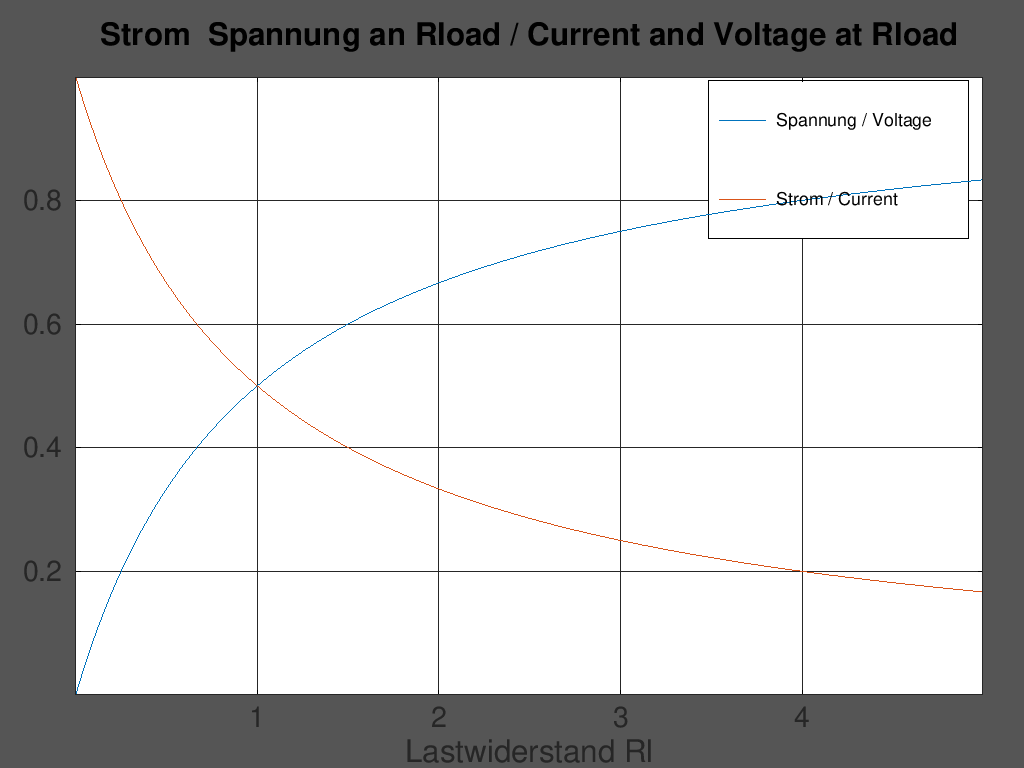

In [71]:
figure(fig++);
plot(rl,isource.*rparallel,'linewidth',2,rl,isource.*(rparallel./rl),'linewidth',2);
grid on;
title("Strom & Spannung an Rload / Current and Voltage at Rload");
xlabel("Lastwiderstand Rl");
#ylabel("1==100%");
lgd=legend ("Spannung / Voltage","Strom / Current");
set(lgd,'FontSize',10);
axis("tight");
set (gca, 'linewidth', 2);